In [1]:
import Statistics.std
using Statistics
using LinearAlgebra

# CHEMENG 4H03: Assignment #2

*Ernest Spahiu 400197077, Feb 2. 2024* 


##### Q1: SVD 
a\): Creating generic rank-1 matrix, and use Eckart Young theorem to justify why SVD is the way it is.

The SVD expresses a big matrix of measurements as a sum of rank 1 matrices, where a rank 1 is a matrix where all rows are multiples of each other. In this case, the original matrix already has rank one. Computing the SVD will yield terms consisting of the singular values of matrix (sigma) multiplied by the corresponding $\mathbf {U\, V}^{\mathrm{T}}$ term. The Eckart-Young theoreom states that the first p terms of the sum are the best p-rank approximation of A. In this case since A is only rank 1, only the first term is needed, as the rest will be insignificant. This can be seen in the example below, where the SVD of A results in only one singular value, and the rest are 0.

In [2]:
#create a rank-1 matrix
x = [1 0 0; 1 0 0; 1 0 0]
display(x)
print("Rank of x: ")
println(rank(x))
U, Sigma, V = svd(x)

print("Singular values: ")
println(Sigma)

3×3 Matrix{Int64}:
 1  0  0
 1  0  0
 1  0  0

Rank of x: 1
Singular values: [1.7320508075688772, 0.0, 0.0]


b) show that each orthogonal matrix Q has a condition number of 1 using the formula covered in class. 

U and V are the orthogonal matrices, and the formula discussed in class is $cond(Q) = \frac{\sigma_{1}}{\sigma_{last}}$. The orthogonal matrices have an interesting property, where the singular values are all the same, and this means that their condition number is one, as shown below with the example U and V.

In [3]:
U_ex = [0 0 0 1; 0 1 0 0; 0 0 -1 0; 1 0 0 0]
V_t = [0 1 0; 0 0 1; 1 0 0]

U, Sigma, V = svd(U_ex)
display(U_ex)
display(Sigma)
#find cond of U_ex using cond(q) = sigma_first/sigma_last
cond_U = Sigma[1]/Sigma[4]
print("Condition number of U_ex: ")
println(cond_U)

#find cond of V_t
U, Sigma, V = svd(V_t)
cond_V = Sigma[1]/Sigma[3]
print("Condition number of V_t: ")
println(cond_V)

4×4 Matrix{Int64}:
 0  0   0  1
 0  1   0  0
 0  0  -1  0
 1  0   0  0

4-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0

Condition number of U_ex: 1.0
Condition number of V_t: 1.0


c) constructing economy SVD (default svd() function in julia), and showing that rank-2 matrix is as close as possible. 

As seen below, the product of the economy SVD components provides a rank-2 matrix that is very close to the original matrix (all values within 0.1 of actual). This is because the economy SVD is not an approximation, rather it just avoids calculating columns that would be anhilated by the zeros anyway.

In [4]:
A = [1 -2 3; 2 0 5; 3 1 7; 4 4 9; 5 9 11]
display(A)
U, Sigma, V = svd(A)

A_recon = U[:,1:2]*diagm(Sigma[1:2])*V[:,1:2]'
display(A_recon)

5×3 Matrix{Int64}:
 1  -2   3
 2   0   5
 3   1   7
 4   4   9
 5   9  11

5×3 Matrix{Float64}:
 1.08432  -2.00534      2.96556
 2.036    -0.00227843   4.98529
 2.93364   1.0042       7.02711
 3.93937   4.00384      9.02476
 5.0532    8.99663     10.9783

d) finding the induced euclidian norm, nuclear norm and frobenius norm of A. The manual calculations match the built-in functions, excpet for the nuclear norm, which doesn't have a built-in.

In [5]:
#induced eculedian norm of A
norm_A = Sigma[1]
println(norm_A)
println(opnorm(A))

#nuclear norm of A
norm_N = sum(Sigma)
println(norm_N)

#frobeinus norm of A
norm_F = sqrt(sum(A.^2))
println(norm_F) 
println(norm(A))

20.29589194787631
20.295891947876303
25.92844864209277
21.02379604162864
21.02379604162864


##### Q2: PCA Row and Column Swap
a\): How would PCA outcome change when swapping 2 columns of X, 2 rows of X?

In each case, given that we learned PCA identifies the best fit spanning unit vectors and singular terms, the most significant principal components and vector spans will remain the same, as the underlying relationships in the data are not changing. However, since the output of PCA is a product of matrix multiplication, order matters, so swapping rows will change the U vector and swapping columns will change the V vector, and the resulting product of all 3. 

b) As seen in the examples below, swapping columns of X will result in a row swap of V_T, and swapping rows of X will result in the same swap in the rows of U. In both cases, the other values of the matrices remain the same, and sigma values and therefore singular terms are unaffected. The resulting product has the same column and row swap operations, given that it is the product. 

In [6]:
#experiment with simple matrix to find out what happens in PCA when 2 rows are swapped
x = [1 0 0; 1 0 1; 1 0 2]
U, Sigma, V = svd(x)
display(U)
display(Sigma)
display(V)

res = U*Diagonal(Sigma)*V'

#swap columns 2 and 3
x = [1 0 0; 1 1 0; 1 2 0]
U, Sigma, V = svd(x)
display(U)
display(Sigma)
display(V)

res_colswap = U*Diagonal(Sigma)*V'
println(res_colswap)

#swap rows 1 and 2
x = [1 0 1; 1 0 0; 1 0 2]
U, Sigma, V = svd(x)
display(U)
display(Sigma)
display(V)

res_rowswap = U*Diagonal(Sigma)*V'
println(res_rowswap)

3×3 Matrix{Float64}:
 -0.218482   0.88634    0.408248
 -0.521609   0.247502  -0.816497
 -0.824736  -0.391336   0.408248

3-element Vector{Float64}:
 2.6762431989952598
 0.9152717300515844
 0.0

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.58471    0.811242  0.0
  0.0        0.0       1.0
 -0.811242  -0.58471   0.0

3×3 Matrix{Float64}:
 -0.218482   0.88634    0.408248
 -0.521609   0.247502  -0.816497
 -0.824736  -0.391336   0.408248

3-element Vector{Float64}:
 2.6762431989952598
 0.9152717300515844
 0.0

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.58471    0.811242  0.0
 -0.811242  -0.58471   0.0
 -0.0       -0.0       1.0

3×3 Matrix{Float64}:
 -0.521609  -0.247502  -0.816497
 -0.218482  -0.88634    0.408248
 -0.824736   0.391336   0.408248

3-element Vector{Float64}:
 2.676243198995259
 0.9152717300515847
 0.0

3×3 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.58471   -0.811242  0.0
  0.0        0.0       1.0
 -0.811242   0.58471   0.0

[0.9999999999999996 1.6653345369377348e-16 0.0; 0.9999999999999998 1.0000000000000002 0.0; 0.9999999999999997 2.0 0.0]
[0.9999999999999998 -0.0 0.9999999999999996; 1.0000000000000002 0.0 -1.1102230246251565e-16; 0.9999999999999998 0.0 2.0]


In [7]:
display(res)
display(res_colswap)
display(res_rowswap)

3×3 Matrix{Float64}:
 1.0  0.0  1.66533e-16
 1.0  0.0  1.0
 1.0  0.0  2.0

3×3 Matrix{Float64}:
 1.0  1.66533e-16  0.0
 1.0  1.0          0.0
 1.0  2.0          0.0

3×3 Matrix{Float64}:
 1.0  -0.0   1.0
 1.0   0.0  -1.11022e-16
 1.0   0.0   2.0

##### Q3: PCA Temperature Matrix

Column 3 contains X measurements in Celsius, Column 5 contains the exact same measurements but in Fahrenheit. Ignoring noise and measuremment errors and mean-centering each column of x yields: 1.8 * (col 3 of x) = (col 5 of x).

a\): We expect the rank of the matrix to decrease by 1, since one of the columns is a linear combination of the others. Given that PCA decomposes the matrix into k singular terms for a rank of K, its expected that there is also one less singular term compared to a matrix where columns 3 and 5 are linearly independent. Knowing that the singular terms represent the variance captured by each component, and that there is now one less component, PCA seems to capture the relationship between the two columns by representing it as a single compoment. Intuitively, this makes sense, as the 5th column is not adding any new information, and is redundant. 

As seen in the example below, the SVD of A results in only 4 singular terms (rank 4), while B has 5 singular terms (rank 5), as columns 3 and 5 are providing essentially the same information. 

In [8]:
#change 5th column to be 1.8 * 3rd column
X = [2 5 5 5 9.5; 6 6 5 3 7; 4 2 4 6 4; 4 5 4 4 3]
A = [ 1 0 1 0 1; 1 2 0 2 0; 1 1 1 1 1; 0 0 0 2 0 ; 1.8 1.8 1.8 1.8 1.8]
A = A'
display(A)
print("Rank of A: ")
println(rank(A))
U, Sigma, V = svd(A)
display(U)
display(Sigma)
display(V)

B = [ 1 0 1 0 1; 1 2 0 2 0; 1 1 1 1 1; 0 0 0 2 0 ; 0.3 0.2 0.6 0.7 0.3]
B = B'
display(B)
print("Rank of B: ")
println(rank(B))
U, Sigma, V = svd(B)
display(U)
display(Sigma)
display(V)
#how does PCA capture the relationship between the 3rd and 5th columns?

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  1.0  1.0  0.0  1.8
 0.0  2.0  1.0  0.0  1.8
 1.0  0.0  1.0  0.0  1.8
 0.0  2.0  1.0  2.0  1.8
 1.0  0.0  1.0  0.0  1.8

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.440242   0.249644  -0.187454   0.841859   -0.0
 -0.487364  -0.204722  -0.766467  -0.36482    -1.89755e-16
 -0.35427    0.493822   0.227171  -0.281116    0.707107
 -0.563604  -0.638785   0.523619   0.0112859   1.01734e-16
 -0.35427    0.493822   0.227171  -0.281116   -0.707107

5-element Vector{Float64}:
 5.4378198595197365
 2.426225323932865
 1.2741728951661535
 0.34645242984215796
 1.3593848686205897e-17

5×5 Matrix{Float64}:
 -0.211258   0.509964   0.209459    0.807114    2.32664e-17
 -0.467499  -0.592431  -0.528303    0.389057    1.20981e-16
 -0.404528   0.162302   0.0188668  -0.213327   -0.874157
 -0.20729   -0.526567   0.821896    0.0651515   4.97995e-17
 -0.72815    0.292143   0.0339603  -0.383989    0.485643

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 1.0  1.0  1.0  0.0  0.3
 0.0  2.0  1.0  0.0  0.2
 1.0  0.0  1.0  0.0  0.6
 0.0  2.0  1.0  2.0  0.7
 1.0  0.0  1.0  0.0  0.3

5×5 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.379626   0.393099    0.207883  -0.757545    0.290288
 -0.504397  -0.0937382   0.765758   0.371161   -0.112475
 -0.215518   0.56667    -0.254249   0.535446    0.530181
 -0.718191  -0.463275   -0.518155  -0.0288607  -0.0161193
 -0.198042   0.548587   -0.193061   0.0287835  -0.788499

5-element Vector{Float64}:
 3.94416576118489
 2.1532590199033295
 1.3242297821848896
 0.3045738745462942
 0.17516358188900613

5×5 Matrix{Float64}:
 -0.201104   0.700499  -0.180805    -0.634709   0.182519
 -0.716198  -0.334808   0.530942    -0.239495   0.188964
 -0.511078   0.441815   0.00617422   0.489159  -0.55162
 -0.364179  -0.430301  -0.782576    -0.189515  -0.184048
 -0.229763   0.129788  -0.270089     0.514388   0.769949

Rank of A: 4
Rank of B: 5


b) Batch reactor process involving species A and B: reaction is A -> 2B. So if Cq is the concentration of species Q, the conservation equation is: 2C_A + C_B = constant. This means that column one, containing A, will be linearly dependent on column 2, containing B. According to the same logic as part a), the rank of a matrix depends on the number of linearly independent rows or columns, and this situation has 2 linearly dependent columns, which means the rank of the matrix will only be 1. The SVD, which PCA relies on to form the diagonal matrix sandwich will also reflect this, and the singulars term will be 0 for the second term and after, as column 2 is not providing new information.

##### Q4: PCA of Given Dataset

a\) importing data using readlm for delimited file  

In [9]:
#a)
using DelimitedFiles
#each line is column is seperated by a comma
data = readdlm("data.csv", ',', skipstart=1);

In [11]:
#b) in this step, the leftmost and right most columns were removed, and randperm
#was used to randomly select 80% of the rows by generating a random permutation of the indices
#and selecting the first 80% of the data defined by the indices. Mean centering was done by finding
#the mean of each column and subtracting the mean from each element in the column.
using Random, Statistics
X = data[:, 2:end-1]
#store the 2 removed columns of the data in a new matrix for later use
Y = data[:, [1, end]]
display(data)
display(Y)

perc = 0.8
#then use randperm to randomly select 80% of the data
m = size(X,1);
indexrand = randperm(m)[1:round(Int, perc*m)]
X_rand = X[indexrand, :]

#save remaining 20% should be saved as the validation data
X_val = X[setdiff(1:m, indexrand), :]
println(size(X_val))

display(X_val)

#apply same random permutation to Y
Y_rand = Y[indexrand, :]
display(Y_rand)

#same permutation to Y_val
Y_val = Y[setdiff(1:m, indexrand), :]
display(Y_val)

#mean center the column data in preparation for PCA
meanVector = mean(X_rand, dims=1)
X_centered = X_rand .- meanVector

998×13 Matrix{Float64}:
   1.0   1.18608    2.69605    2.71164  …   0.757205    2.28095    1.0
   2.0   1.28266    2.15591    1.5026      -2.1367      0.643473   1.0
   3.0   1.21284    2.74717    4.15326      0.87275     1.58348    1.0
   4.0   1.14518    0.0782117  2.89938      1.12024     3.64751    1.0
   5.0   0.516195   3.07619    4.45219      0.550947   -0.0887208  0.0
   6.0  -0.189645   1.80219    1.38782  …   0.661969   -0.274945   1.0
   7.0   0.242275   1.11481    3.95236      1.78975     2.75444    1.0
   8.0  -0.387149   2.589      3.59031      1.14681     1.11109    0.0
   9.0   0.439298   2.46894    2.40675      1.11604     0.46163    1.0
  10.0  -0.340802   0.0789618  1.66271      2.5392      3.71595    1.0
   ⋮                                    ⋱   ⋮                      
 990.0   1.36599    2.96674    4.64637      1.75502     2.09255    1.0
 991.0  -0.696079   2.90093    3.5718   …   1.95028     3.54082    1.0
 992.0   1.79532    1.71139    2.25992     -0.302174    

998×2 Matrix{Float64}:
   1.0  1.0
   2.0  1.0
   3.0  1.0
   4.0  1.0
   5.0  0.0
   6.0  1.0
   7.0  1.0
   8.0  0.0
   9.0  1.0
  10.0  1.0
   ⋮    
 990.0  1.0
 991.0  1.0
 992.0  0.0
 993.0  1.0
 994.0  1.0
 995.0  1.0
 996.0  1.0
 997.0  1.0
 998.0  1.0

200×11 Matrix{Float64}:
  1.18608   2.69605   2.71164   1.65115   …  3.28845   0.757205   2.28095
 -0.071286  1.4651    3.61087   0.339042     2.52088   1.36196    1.82301
 -0.316014  1.10422   1.88488   1.86635      2.05771   1.99805    0.105402
  1.14929   1.77292   2.50865   1.87646      2.36726   1.25403    2.77997
  0.644815  2.47728   4.43304   2.35672      3.2399    0.359932   1.93938
  0.897087  0.518356  2.21875   3.59067   …  3.91163   1.13946    2.86473
  1.49801   2.74465   3.44858   3.46408      4.22401   2.81435    1.39562
 -1.40471   4.76245   1.45202   5.46129      2.54997   1.49674    0.925783
  0.884605  1.08201   4.83355   3.88998      2.46834   0.359998   2.30057
  1.42343   0.228644  1.79382   2.92889      2.6318    0.38025    3.14342
  ⋮                                       ⋱                       ⋮
  1.15007   0.670527  3.71922   2.89907      2.78655   1.00373    3.21797
 -1.31081   1.70986   2.67604   4.15514      2.31204   0.840494   0.513032
  1.59828   2.385

798×2 Matrix{Float64}:
 826.0  1.0
 369.0  1.0
 536.0  1.0
 979.0  1.0
  14.0  1.0
 670.0  1.0
 266.0  1.0
 944.0  1.0
 396.0  1.0
 544.0  1.0
   ⋮    
 759.0  1.0
 268.0  1.0
 176.0  1.0
 323.0  1.0
 509.0  1.0
 742.0  1.0
 388.0  1.0
 534.0  1.0
 733.0  1.0

200×2 Matrix{Float64}:
   1.0  1.0
  13.0  1.0
  20.0  1.0
  27.0  1.0
  29.0  1.0
  30.0  1.0
  31.0  0.0
  35.0  1.0
  37.0  1.0
  38.0  1.0
   ⋮    
 968.0  1.0
 971.0  1.0
 975.0  1.0
 976.0  1.0
 988.0  1.0
 989.0  1.0
 992.0  0.0
 994.0  1.0
 998.0  1.0

(200, 11)


798×11 Matrix{Float64}:
 -1.80788    2.03419       0.866959   …   0.508248   -2.10813     -1.32994
  0.935449   0.517637     -1.31572       -0.501293   -0.251467    -0.0985041
 -3.20087   -0.102163     -0.0645003      0.17282    -1.20853     -0.597027
  1.54808   -0.638383     -0.463569       0.228811    0.355111    -2.37053
  2.1189    -0.392267      0.299542      -1.91661    -0.147999     0.259565
 -0.203046   1.10383       0.998037   …   1.74602     1.29275      0.0902868
 -0.681118  -0.523445      0.0699264      2.11356     1.99955      0.493182
  0.901487  -0.424122     -1.41648       -1.10323     0.110427    -0.570069
 -0.579945   1.4873       -0.76927       -0.961192    0.873029    -2.3207
  0.248382   0.000223104  -0.334442       0.580531   -0.00633383  -2.25455
  ⋮                                   ⋱                            ⋮
  0.264632  -1.12493       0.0512832      0.688962    0.775792    -0.921014
 -1.19395   -0.625135     -0.344685   …   1.75133     0.365323     0.44951

c) To scale the standard deviation of the data so that the noise was 1, the intrinsic standard deviation of the noise must have been found initially, either through some sort of instrumentation/lab testing values for each mixture, or repeated measurements of the same mixture. 



In [12]:
#d) applying the Gavish and Donoho threshold formula to find the optimal
#threshold, result was about 41

#beta = number of columns/number of rows
n = size(X_centered, 2)
m = size(X_centered, 1)
beta = n/m 
std_dev = 1

tau = (std_dev)*sqrt(m)*sqrt(2*(beta + 1) + 8*beta/((beta + 1)+sqrt(beta^2 + 14*beta + 1)))

40.740437116710396

In [13]:
#e)  using economy svd to find the first 2 principal components
using LinearAlgebra
U, Sigma, V = svd(X_centered)
#save the product of the first 2 principal components
X_term2 = U[:, 1:2]*Diagonal(Sigma[1:2])*V[:, 1:2]'

println(Sigma[1:2])
loadingV1 = Sigma[1]*V[:, 1];
loadingV2 = Sigma[2]*V[:, 2];

#showing the first 2 principal components v1 and v2
display(V[:, 1])
display(V[:, 2])


11-element Vector{Float64}:
  0.10023365091554033
 -0.11110857517187214
 -0.10091926676388195
  0.0985865154277071
  0.09143281275794468
 -0.5336334151405899
 -0.11107380151655098
 -0.17922990792934104
 -0.5489623173500734
 -0.15550890636519096
  0.5427486749930249

11-element Vector{Float64}:
 -0.45045168369123784
 -0.46783266505848314
  0.0632792399118581
  0.14687991432708317
  0.0881572688852231
 -0.23662628522518367
  0.1410302919860283
 -0.2620482343567175
  0.22591943649166338
  0.5875104404335291
  0.06416598803442596

[30.861335120162845, 30.529820483219037]


798×12 Matrix{Float64}:
  0.705107    1.00771       0.0120712  …  -0.887943    -0.81325    1.0
  0.23561     0.0203253    -0.123636      -0.333132     0.54719    1.0
 -0.287831   -0.153525      0.0991092      0.392151    -0.335369   1.0
  0.153842    0.608902      0.159613      -0.148944    -1.18438    1.0
  0.763901    0.526538     -0.214984      -1.02705      0.581841   1.0
 -0.376709   -0.21326       0.124738   …   0.511821    -0.407016   1.0
 -0.972974   -0.585336      0.308246       1.31797     -0.961897   1.0
  0.403082    0.386008     -0.0697902     -0.529484     0.0270313  1.0
 -0.124327   -0.12777       0.0180115      0.162311     0.0142068  1.0
  0.214071    0.615553      0.128595      -0.233935    -1.04827    1.0
  ⋮                                    ⋱                ⋮          
 -0.661045   -0.548905      0.148405       0.878028    -0.262107   1.0
 -0.669589   -0.750326      0.071911   …   0.867004     0.237479   1.0
  0.25581     0.709221      0.143035      -0.282581    -

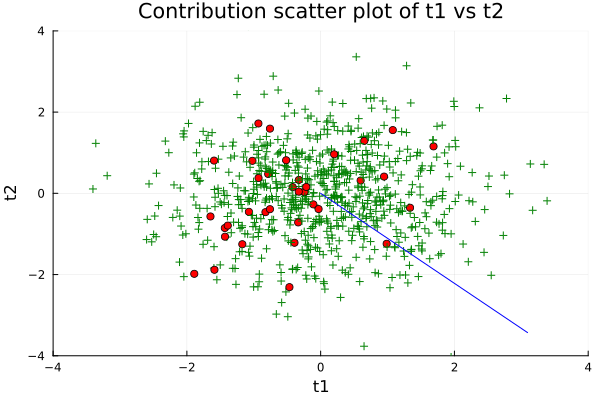

In [14]:
#f)include the last column of the original data that was omitted earlier
X_term2 = hcat(X_term2, Y_rand[:, end]);
display(X_term2)

#from lecture, the t scores t1 and t2 can be found by multiplying U by Sigma
#or V*Q(measurements)

t1 = U[:, 1]*Sigma[1]
t2 = U[:, 2]*Sigma[2]

#creating contribution scatter plot of t1 vs t2
using Plots
plot(1)
for i in 1:size(U, 1)
    if Y_rand[i, end] == 0
        scatter!([t1[i]], [t2[i]], color = "red", label = "")
    else
        scatter!([t1[i]], [t2[i]], color = "green", label = "", marker = :cross)
    end
end
plot!(xlabel = "t1", ylabel = "t2", title = "Contribution scatter plot of t1 vs t2")
#add a line of loadingV1
plot!([0, loadingV1[1]], [0, loadingV1[2]], color = "blue", label = "loadingV1", legend = :false)
plot!(xlims = (-4, 4), ylims = (-4, 4))


g) based on the contribution pot in f, what is a method to use the values of t1 and t2 to classify mixtures as good or bad?.

Ideally, the contribution plot would show some clear visual distinctions between "good" and "bad" mixture values, and the t1 and t2 values could then be used to graphically distinguish between the two outcomes. In this case, the green markers (good values) seem to be more spread vertically, and the bad values seem closer to 0 and spread horizontally, but in general the data is very noisy and there is no clear immediate visual distinction. There is also no clear region/space where the "bad" values are located, but if there were, as shown in the picture below, it would be easy to classify the two outcomes based on where the the values lie, maybe by drawing a line or seperation boundary. 

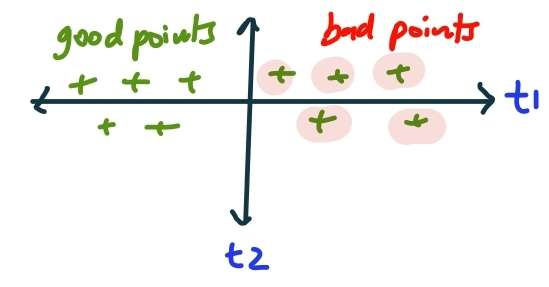

Quantitatevly, the t1 and t2 values could be classified based on their distance from the line of best fit, as we would expect the "good" values to have a different quantified relationship and therefore differing distances from the line. 

#h) A simple graphical method was applied to the validation data to classify the mixtures as good or bad, where the middle horizontal spread region was targeted as bad by setting up a threshold based on the min and max t2 values. The measurements for new rows of x in the validation data were mean centered by subtracting the mean columns stored in the first section (order maintained).

In general, this was a very simple method and not very effective, especially given the noise in the data. The overall misclassification rate was 22.5% , shown below as false positives marked by squares and false negatives marked by stars. Only 3 bad mixtures were misclassified as good, but around 21% of the marked bad mixtures were actually good.

In the future, better methods could be to find the distances of the points to the line of best fit, using a combination of different norms, or even further regression. The lack of patterns in this data made it especially difficult to classify the mixtures through a graphical approach.

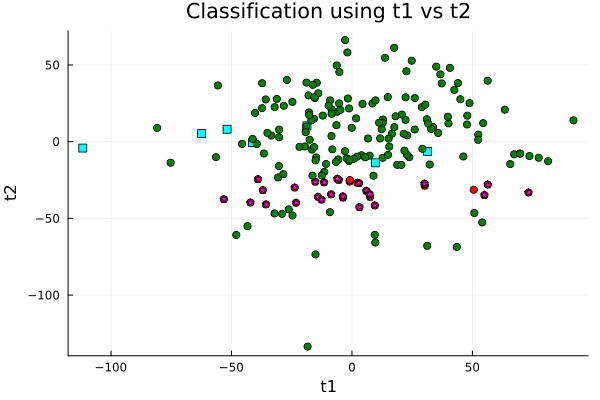

In [15]:
#h) applying the classification methods discussed in g) to classify the remaining training data

#mean center validation data using the mean vector from the training data we stored earlier
X_val_centered = X_val .- meanVector

#for each row in X_val, find the t score ti = qi*vi
t1_val = X_val_centered*loadingV1
t2_val = X_val_centered*loadingV2

#applying decision rule to classify data clustering horizontally around middle as bad
t2max = maximum(t2_val)
t2min = minimum(t2_val)
t2mid = (t2max + t2min)/2

falsepos = 0
falseneg = 0
plot(2)
for i in 1:size(X_val, 1)
    #if falls near the middle, then it is bad (0)
    if (t2_val[i] > t2mid - 10) && (t2_val[i] < t2mid + 10)
        scatter!([t1_val[i]], [t2_val[i]], color = "red", label = "")
        #misclassification
        if Y_val[i, end] == 1
            falseneg += 1
            scatter!([t1_val[i]], [t2_val[i]], color = "magenta", label = "", marker = :star)
        end
    #it is good (1)
    else
        scatter!([t1_val[i]], [t2_val[i]], color = "green", label = "")
        #misclassification
        if Y_val[i, end] == 0
            falsepos += 1
            scatter!([t1_val[i]], [t2_val[i]], color = "cyan", label = "", marker = :square)
        end
    end
end
plot!(xlabel = "t1", ylabel = "t2", title = "Classification using t1 vs t2", legend = false)

Misclassification rate: 18.0
False positive rate: 3.5000000000000004
False negative rate: 14.499999999999998


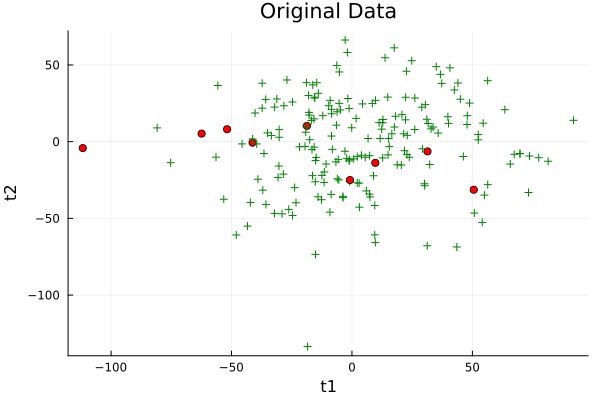

In [16]:
misclass_rate = (falsepos+falseneg)/size(X_val, 1)
print("Misclassification rate: ")
println(misclass_rate * 100)
print("False positive rate: ")
println(falsepos/size(X_val, 1) * 100)
print("False negative rate: ")
println(falseneg/size(X_val, 1) * 100)

plot(3)
for i in 1:size(X_val, 1)
    if Y_val[i, end] == 0
        scatter!([t1_val[i]], [t2_val[i]], color = "red", label = "")
    else
        scatter!([t1_val[i]], [t2_val[i]], color = "green", label = "", marker = :cross)
    end
end
plot!(xlabel = "t1", ylabel = "t2", title = "Original Data", legend = false)